In [72]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import pandas as pd

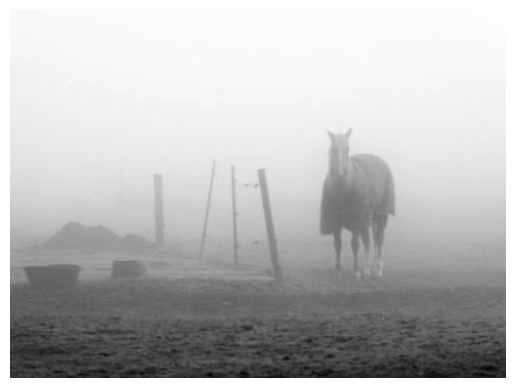

In [73]:
img = cv2.imread("horse.jpg" , 0)
plt.imshow(img , cmap = "gray")
plt.axis('off')
plt.show()

In [74]:
#histogram equalization table
n = []
nk = []
pdf = []
cdf = []
mul_cdf = []
round_up_freq = []
running_cdf = 0

for k in range(0,256):
    n.append(k)
    c = np.count_nonzero(k == img)
    nk.append(c)

total = sum(nk)

for i in range(0, 256):
    pdf.append(nk[i]/total)
    running_cdf += (nk[i]/total)
    cdf.append(running_cdf)
    mul_cdf.append(cdf[i]*255)
    round_up_freq.append(round(mul_cdf[i]))

In [75]:
for i in range(200,210):
  print(n[i] , nk[i], pdf[i], cdf[i], mul_cdf[i], round_up_freq[i])

200 601 0.003449265381083563 0.41759067952249784 106.48562327823694 106
201 587 0.003368916437098255 0.4209595959595961 107.344696969697 107
202 608 0.003489439853076217 0.4244490358126723 108.23450413223144 108
203 687 0.003942837465564738 0.428391873278237 109.23992768595043 109
204 883 0.005067722681359045 0.43345959595959604 110.532196969697 111
205 879 0.005044765840220386 0.43850436179981644 111.8186122589532 112
206 861 0.004941460055096419 0.4434458218549129 113.07868457300279 113
207 937 0.005377640036730946 0.44882346189164385 114.44998278236918 114
208 1014 0.005819559228650138 0.454643021120294 115.93397038567497 116
209 1146 0.006577134986225895 0.4612201561065199 117.61113980716257 118


rmin of original image is :  106
rmax of original image is :  241

rmin of new image is :  0.0
rmax of new image is :  255.0


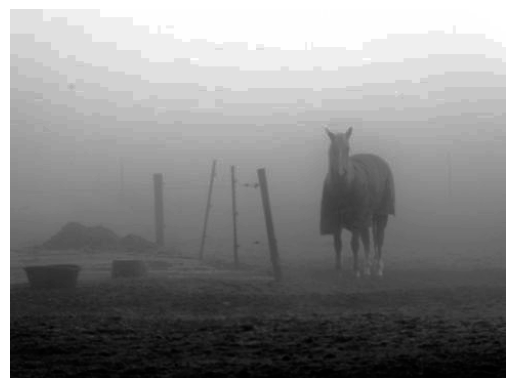

In [76]:
h , w = img.shape
he_img = np.zeros(img.shape)

for i in range(h):
    for j in range(w):
        r = img[i][j]
        he_img[i][j] = round_up_freq[r] 
        
print("rmin of original image is : " , img.min())
print("rmax of original image is : " , img.max())
print("\nrmin of new image is : " , he_img.min())
print("rmax of new image is : " , he_img.max())    
plt.imshow(he_img , cmap = 'gray')
plt.axis('off')
plt.show()

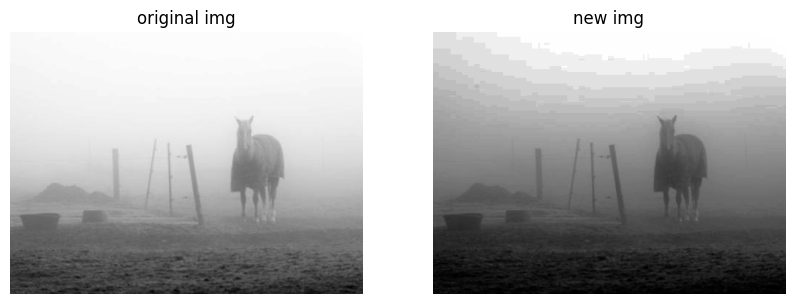

In [77]:
fig = plt.figure(figsize = (10,5))
rows = 1
cols = 2

fig.add_subplot(rows, cols , 1)
plt.imshow(img , cmap = "gray")
plt.title("original img")
plt.axis('off')

fig.add_subplot(rows, cols , 2)
plt.imshow(he_img , cmap = "gray")
plt.title("new img")
plt.axis('off')

plt.show()